In [ ]:
# Assignment No 4
# Name-Chetan Babasaheb Wakale 
# Roll No-144
# Batch-T3 (B)
# PRN-UIT22M1136

In [37]:
import numpy as np
from sklearn.datasets import make_classification


X, y = make_classification(
    n_features=6,
    n_classes=3,
    n_samples=800,
    n_informative=2,
    random_state=1,
    n_clusters_per_class=1,
)

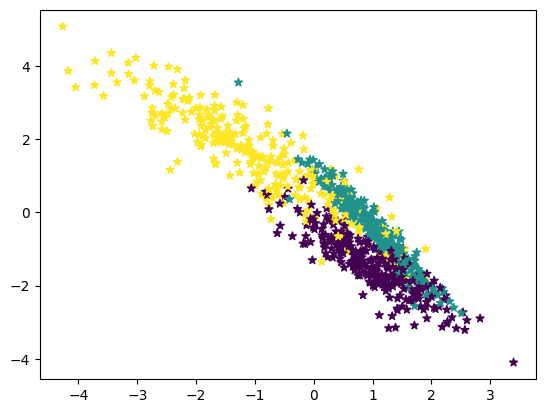

In [2]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y, marker="*");

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=125
)

In [4]:
from sklearn.naive_bayes import GaussianNB

# Build a Gaussian Classifier
model = GaussianNB()

# Model training
model.fit(X_train, y_train)

# Predict Output
predicted = model.predict([X_test[6]])

print("Actual Value:", y_test[6])
print("Predicted Value:", predicted[0])

Actual Value: 0
Predicted Value: 0


In [5]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

y_pred = model.predict(X_test)
accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.8484848484848485
F1 Score: 0.8491119695890328


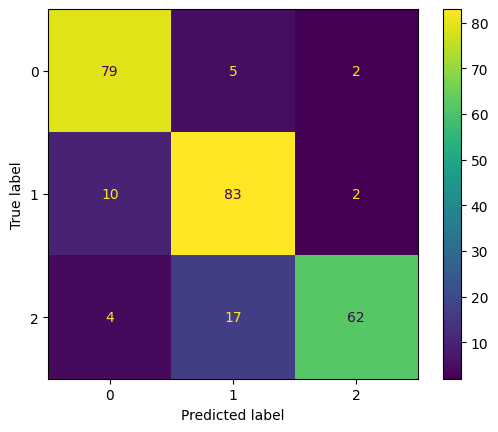

In [6]:
labels = [0,1,2]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score
)
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
import pandas as pd




df = pd.read_csv('ai_ghibli_trend_dataset_v2.csv')


In [8]:
df.head()

,image_id,user_id,prompt,likes,shares,comments,platform,generation_time,gpu_usage,file_size_kb,resolution,style_accuracy_score,is_hand_edited,ethical_concerns_flag,creation_date,top_comment
0,77ce5c72-eb45-4651-bcb1-c0677c0fceaf,6a7adf3d,Studio Ghibli-inspired ocean with giant fish,916,410,555,Reddit,4.80,49,1684,1024x1024,89,Yes,Yes,2025-03-11,"So nostalgic, feels like childhood memories. 🎥..."
1,7d66c67f-0d11-4ef9-895c-d865ef11fe40,523b8706,Ghibli-style village at sunset,2965,1361,417,Reddit,11.11,81,2808,1024x1024,92,Yes,No,2025-03-11,Absolutely stunning! Love the details. 🎨 #5729
2,d7978afd-3932-4cce-9a21-5f9bf2bc1f64,0e02592a,A lone traveler exploring an enchanted ruin,4727,655,785,Instagram,5.56,41,1800,2048x2048,61,No,No,2025-03-06,Is this AI or hand-painted? Incredible! #8001
3,cb34636a-a15c-4b15-999c-759dbb8896fe,9ed78a42,Spirited Away-style bustling market street,1629,1954,212,TikTok,12.45,88,479,2048x2048,76,No,No,2025-03-23,Is this AI or hand-painted? Incredible! #5620
4,7511fbb8-db05-4584-a3a4-e8bb525ed58b,69ec8f02,Magical Ghibli forest with floating lanterns,2573,1281,913,TikTok,4.80,64,1789,512x512,58,No,Yes,2025-03-06,This looks straight out of a Ghibli movie! 🌟 #...


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   image_id               500 non-null    object 
 1   user_id                500 non-null    object 
 2   prompt                 500 non-null    object 
 3   likes                  500 non-null    int64  
 4   shares                 500 non-null    int64  
 5   comments               500 non-null    int64  
 6   platform               500 non-null    object 
 7   generation_time        500 non-null    float64
 8   gpu_usage              500 non-null    int64  
 9   file_size_kb           500 non-null    int64  
 10  resolution             500 non-null    object 
 11  style_accuracy_score   500 non-null    int64  
 12  is_hand_edited         500 non-null    object 
 13  ethical_concerns_flag  500 non-null    object 
 14  creation_date          500 non-null    object 
 15  top_co

In [33]:
df = df.drop(columns=['uuid', 'id', 'name'], errors='ignore')

In [34]:
if df['likes'].dtype == 'object':
    df['likes'] = df['likes'].astype('category').cat.codes

In [41]:
# Ensure X is still a DataFrame before selecting dtypes
X = df.drop(columns=['likes'])  # or any other target column
X = X.select_dtypes(include=[np.number])  # keep only numeric columns

y = df['likes']


In [42]:
# Keep only numeric columns for Naive Bayes
X = X.select_dtypes(include=[np.number])

In [43]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=125
)


In [44]:
# Train GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [45]:
# Predict a single sample for demo
predicted = model.predict(X_test.iloc[[6]])
print("Actual Value:", y_test.iloc[6])
print("Predicted Value:", predicted[0])


Actual Value: 1376
Predicted Value: 250


In [46]:
# Predict full set
y_pred = model.predict(X_test)


In [49]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="weighted")



In [50]:
print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.0
F1 Score: 0.0


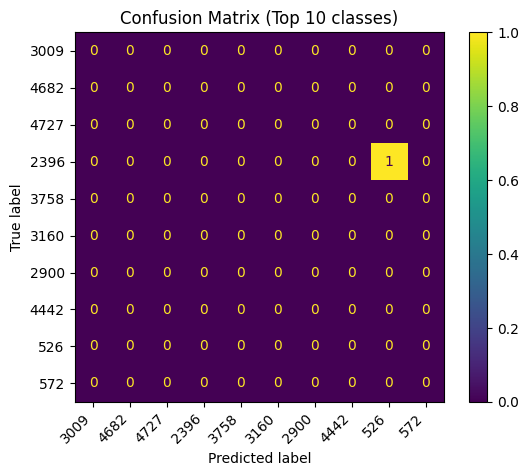

In [52]:
# Show top 10 most common classes only
top_labels = y.value_counts().nlargest(10).index.tolist()

# Filter test predictions and ground truth
mask = y_test.isin(top_labels)
cm = confusion_matrix(y_test[mask], y_pred[mask], labels=top_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=top_labels)
disp.plot()
plt.xticks(rotation=45, ha='right')
plt.title("Confusion Matrix (Top 10 classes)")
plt.show()

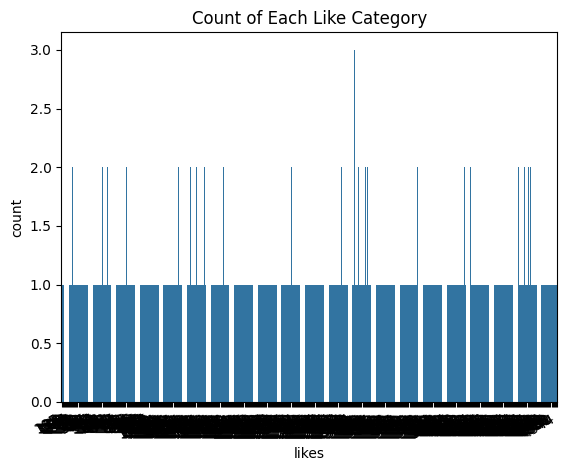

In [54]:
# Countplot
sns.countplot(data=df, x='likes')
plt.xticks(rotation=30, ha='right')
plt.title("Count of Each Like Category")
plt.show()